In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

## 5.1 一次元の離散型確率変数
離散型：取りうる値が整数
### 5.1.1 1次元の離散型確率変数の定義
#### 確率質量関数 PMF
$$
P(X=x_k)=p_k (k=1,2,3,...)
$$

取りうる値xによって確率p_kが決定する関数とも取れる

前章の歪んだサイコロを例にとる

In [2]:
x_set = np.array(range(1,7))

In [3]:
x_set

array([1, 2, 3, 4, 5, 6])

歪んだサイコロの確率分布

1:1/21  
2:2/21  
3:3/21  
4:4/21  
5:5/21  
6:6/21  

以上を確率関数の式$f(x)$として表すと  
  \begin{cases}
    x / 21 & (x \in 1,2,3,4,5,6) \\
    0 & (otherwise)
  \end{cases}

となる, 関数で実装すると

In [98]:
def f(x):
    if x in x_set:
        return x/21
    else:
        return 0

In [99]:
# 取りうる値xと確率関数とセットで持つ確率分布をリストで実装する
X = [x_set, f]

In [6]:
prob = np.array([f(x_k) for x_k in x_set])

In [7]:
# zipで一気に作るのが便利
dict(zip(x_set, prob))

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

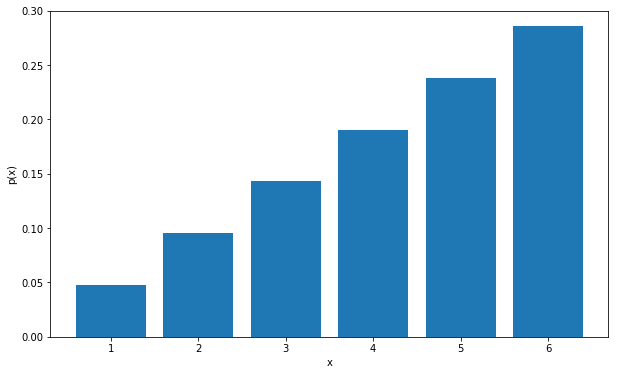

In [8]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('x')
ax.set_ylabel('p(x)')

plt.show()

#### 確率の性質
各確率は足すと一になる(それはそう)

In [9]:
np.all(prob >= 0)

True

In [10]:
np.sum(prob)

0.9999999999999999

#### 累積分布関数
これを使うと出目が3以下の時は確率いくつかみたいなのもできて便利？  

$$
F(x)=P(X \le x)=\sum_{x_k \le x} f(x_k)
$$

In [11]:
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [12]:
F(3)

0.2857142857142857

#### 確率変数の変換
標準化(z-score)する時などに重要  
以下にサイコロの出目にXに対して2X+3と言う変換をかけた確率変数Yを例にとり説明する

変換した後も確率変数であることを抑えておけば大丈夫

In [13]:
y_set = np.array([2*x_k+3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

### 5.1.2 離散型確率変数の指標
これまで一次元データに関して平均や分散などを見てきた.  
確率変数に関しても平均や分散を導出することができる→これで確率変数の特徴を押さえる. 

#### 期待値(平均)
おなじみ期待値, 得られるスコアの平均. 
ある確率分布に無限回思考おいて得られる値の平均→つまりこれは期待値と同じ.   

$$\mu=E(X)=\sum_{k} x_kf(x_k)$$

In [14]:
# x_setでのみ計算
np.sum([x_k * f(x_k) for x_k in x_set])

4.333333333333333

In [15]:
# 1000万回試行して確かめる
sample = np.random.choice(x_set, int(1e7), p=prob)
print(len(sample))
print(np.mean(sample))

10000000
4.3326514


これを平均として, この後の無限回試行した場合の確率変数の分散や共分散を求めていく.  
また変換した確立変数の期待値も同様に求めることができる. 

例えばさっきの
$X→2X+3=Y$の例で言うと  
$$
E(Y) = E(2X+3) = \sum_{k}(2x_k+3)f(x_k)
$$

これを一般化して

$$
E(g(X)) = \sum_{k}g(x_k)f(x_k)
$$

定義できる. 

In [100]:
def E(X, g = lambda x: x):
    '''
    docstring
    一般化された期待値を求める関数
    _がprefixにつくと使用者が意識しなくて良い変数として扱う意味があった気がする
    '''
    _x_set, f = X
    return np.sum([g(x_k)*f(x_k) for x_k in _x_set])

In [18]:
E(X)

4.333333333333333

In [19]:
E(X, g=lambda x:2*x+3)

11.666666666666664

#### 期待値の線形性
$$
E(aX+b) = aE(X)+b  \\
a, b \in R
$$

実数は外に出せる

In [23]:
print(2*E(X)+3)
print(E(X, g=lambda x:2*x+3))

11.666666666666666
11.666666666666664


#### 分散
基本計算は同じ

$$
V(X)=\sum_{k}(x_k-\mu)^2f(x_k)
$$

これを変換も含めた一般化をすると

$$
V(g(X))=\sum_{k}(g(x_k)-\mu)^2f(x_k)
$$

となる

In [24]:
mean = E(X)
np.sum([(x_k - mean)**2*f(x_k) for x_k in x_set])

2.2222222222222223

In [35]:
def V(X, g = lambda x: x):
    '''
    一般化された分散を求める関数
    '''
    _x_set, f = X
    _mean = E(X, g)
    return np.sum([(g(x_k)-_mean)**2 * f(x_k) for x_k in _x_set])

In [36]:
V(X)

2.2222222222222223

#### 分散の公式
$$
V(aX+b) = a^2V(X)  \\
a, b \in R
$$

In [37]:
V(X, lambda x: 2*x+3)

8.88888888888889

In [38]:
# V(2X+3) = 4V(X)
4*V(X)

8.88888888888889

## 5.2 2次元の離散型確率変数
二つの歪んだサイコロを用いる. 

### 5.2.1 2次元の離散型確率変数
#### 同時確率分布
2つ同時に扱い$(X,Y)$として表す.
これらの取りうる値の組み合わせを
$$
{(x_i, y_j|i=1,2,3...; j=1,2,3...)}
$$
とすると, それらの組み合わせの値をとる確率は
$$
P(X=x_i, Y=y_j)=p_ij
$$
と表す, このような$(X,Y)$どちらもの振る舞いを同時に考えた確率分布のことを
**同時確率分布**と言う.

今回は二つのサイコロの目を  

X:{1,2,3,4,5,6}  
Y:{2,3,4,5,6,7,8,9,10,11,12}(二つのサイコロの出目を足したもの)  

として考える.

今回の場合, 同時確率はXの確率とYの確率を単に掛け算することで計算できる. 

$$
f_{XY}(x,y)=
\begin{cases}
    y(x-y) / 441 & (y \in \{1,2,3,4,5,6\}\ and\ x-y \in \{1,2,3,4,5,6\}) \\
    0 & (otherwise)
  \end{cases}
$$

In [103]:
# この教科書変数上書きするのあんましイケてない
x_set_2 = np.arange(2,13)
y_set_2 = np.arange(1,7)

In [50]:
def f_XY(x, y):
    if (1 <= y <= 6) and (1 <= x-y <=6):
        return y*(x-y) / 441
    else:
        return 0

In [76]:
XY = [x_set_2, y_set_2, f_XY]

In [52]:
prob_2 = np.array([[f_XY(x_i, y_j) for y_j in y_set_2] for x_i in x_set_2])

In [53]:
prob_2

array([[0.002, 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.005, 0.005, 0.   , 0.   , 0.   , 0.   ],
       [0.007, 0.009, 0.007, 0.   , 0.   , 0.   ],
       [0.009, 0.014, 0.014, 0.009, 0.   , 0.   ],
       [0.011, 0.018, 0.02 , 0.018, 0.011, 0.   ],
       [0.014, 0.023, 0.027, 0.027, 0.023, 0.014],
       [0.   , 0.027, 0.034, 0.036, 0.034, 0.027],
       [0.   , 0.   , 0.041, 0.045, 0.045, 0.041],
       [0.   , 0.   , 0.   , 0.054, 0.057, 0.054],
       [0.   , 0.   , 0.   , 0.   , 0.068, 0.068],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.082]])

<function matplotlib.pyplot.show(*args, **kw)>

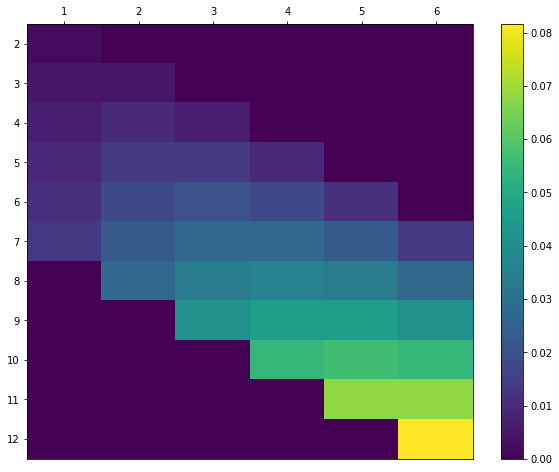

In [58]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
c=ax.pcolor(prob_2)
ax.set_xticks(np.arange(prob_2.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(prob_2.shape[0])+0.5, minor=False)
ax.set_xticklabels(np.arange(1,7), minor=False)
ax.set_yticklabels(np.arange(2,13), minor=False)
# y軸反転下が大きくなるように
ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c,ax=ax)
plt.show

In [62]:
# 確率が0以上か確かめる
print(np.all(prob_2 >= 0))
# 確率の総和が1か
print(np.sum(prob_2)==1.0)

True
True


#### 周辺確率分布
同時確率分布においてどちらかの変数についてのみ分布を知りたい場合に用いる.
→$f_{XY}$に取りうるYの値を全て足し合わせることによってもとまる

$$
f_X(x)=\sum_{k}f_{XY}(x,y_k)
$$

こうすることで確率変数Xのみが残ることになるこれを特にXの**周辺確率分布**という

In [69]:
def f_X(x):
    '''
    Xの周辺確率分布を求める関数
    '''
    return np.sum([f_XY(x, y_k) for y_k in y_set_2])

def f_Y(y):
    '''
    Yの周辺確率分布を求める関数
    '''
    return np.sum([f_XY(x_k, y) for x_k in x_set_2])

In [70]:
X_2 = [x_set_2, f_X]
Y_2 = [y_set_2, f_Y]

ここでX_2,Y_2の周辺確率分布を見てみる.

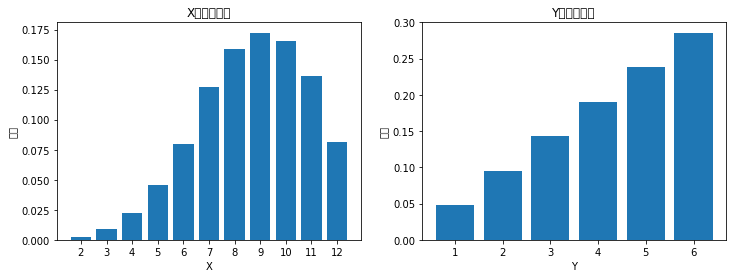

In [72]:
prob_x = np.array([f_X(x_k) for x_k in x_set_2])
prob_y = np.array([f_Y(y_k) for y_k in y_set_2])

fig = plt.figure(figsize=(12,4))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.bar(x_set_2,prob_x)
ax1.set_title("Xの周辺分布")
ax1.set_xlabel("X")
ax1.set_ylabel("確率")
ax1.set_xticks(x_set_2)

ax2.bar(y_set_2,prob_y)
ax2.set_title("Yの周辺分布")
ax2.set_xlabel("Y")
ax2.set_ylabel("確率")
ax2.set_xticks(y_set_2)

plt.show()
# 日本語拡張入れてなかった…

### 5.2.2 2次元の離散型確率変数の指標
一次元同様定義できる. 

#### 期待値
Xの期待値
$$
\mu_X = E(X) = \sum_{i} \sum_{j}x_if_{XY}(x_i, y_j)
$$

In [73]:
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set_2 for y_j in y_set_2])

8.666666666666666

X,Yの関数g(X,Y)の期待値は次のように定義できる

$$
E(g(X,Y)) = \sum_{i} \sum_{j}g(x_i,y_i)f_{XY}(x_i, y_j)
$$

In [74]:
def E(XY, g):
    _x_set, _y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j) for x_i in _x_set for y_j in _y_set])

In [77]:
mean_X = E(XY, lambda x, y:x)
mean_X

8.666666666666666

In [78]:
mean_Y = E(XY, lambda x, y:y)
mean_Y

4.333333333333333

#### 期待値の線形性
$$
E(aX+bY) = aE(X)+bE(Y)  \\
a, b \in R
$$

実数は外に出せる

In [80]:
E(XY, lambda x, y:2*x+3*y)

30.333333333333332

In [81]:
2*mean_X+3*mean_Y

30.333333333333332

#### 分散
Xの分散
$$
\sigma_X = V(X) = \sum_{i} \sum_{j}(x_i - \mu_X)^2f_{XY}(x_i, y_j)
$$

In [82]:
np.sum([(x_i-mean_X)**2*f_XY(x_i, y_j) for x_i in x_set_2 for y_j in y_set_2])

4.444444444444444

g(X,Y)について一般化すると
$$
V(g(X,Y)) = \sum_{i} \sum_{j}g(x_i, y_j)-E(g(X,Y)))^2f_{XY}(x_i,y_i)
$$

In [85]:
def V(XY, g):
    _x_set, _y_set, f_XY = XY
    _mean=E(XY, g)
    return np.sum((g(x_i, y_j)-_mean)**2*f_XY(x_i, y_j) for x_i in _x_set for y_j in _y_set)

In [86]:
var_X = V(XY, g=lambda x,y: x)
var_X

/Users/Zi/anaconda3/envs/jupyter-env/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.


4.444444444444444

In [87]:
var_Y = V(XY, g=lambda x,y: y)
var_Y

/Users/Zi/anaconda3/envs/jupyter-env/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.


2.222222222222222

#### 共分散
これにより2つの確率変数の間の相関をみることができる

$$
\sigma_{XY}=Cov(X,Y)=\sum_{i} \sum_{j}(x_i-\mu_X)(y_i-\mu_Y)f_XY(x_i,y_j)
$$


In [92]:
def Cov(XY):
    _x_set, _y_set, f_XY = XY
    _mean_X = E(XY, lambda x,y: x)
    _mean_Y = E(XY, lambda x,y: y)
    return np.sum([(x_i-_mean_X)*(y_j-_mean_Y)*f_XY(x_i, y_j) for x_i in _x_set for y_j in _y_set])

In [93]:
cov_xy = Cov(XY)
cov_xy

2.222222222222222

#### 分散の公式
$$
V(aX+bY) = a^2V(X)+a^2V(Y)+2abCov(X,Y)   \\
a, b \in R
$$

これも同様２乗で出せるが項が増えるので注意. 

In [94]:
V(XY, lambda x,y: 2*x+3*y)

/Users/Zi/anaconda3/envs/jupyter-env/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.


64.44444444444443

In [96]:
4 * var_X+9*var_Y+12*cov_xy

64.44444444444443

#### 相関係数
共分散をそれぞれの標準偏差によって割ることでもとまる

$$
\rho_{XY}=\rho(X,Y)=\frac{\sigma_{XY}}{\sigma_X \sigma_Y}
$$

In [97]:
cov_xy/np.sqrt(var_X * var_Y)

0.7071067811865475